## Importing Libaries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("insurance.csv")

In [82]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [83]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [84]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [85]:
df['age'].max()

64

<AxesSubplot:xlabel='age', ylabel='count'>

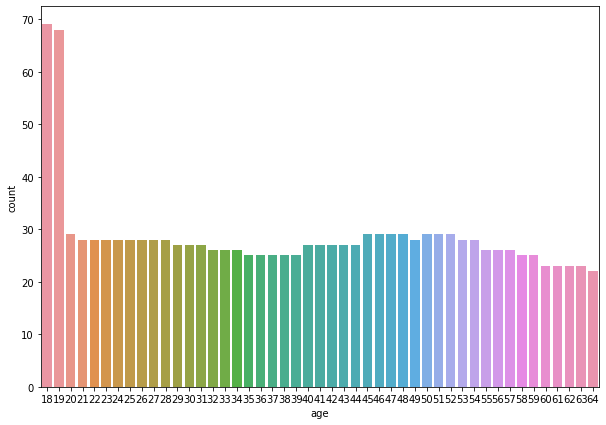

In [86]:
plt.figure(figsize=(10,7))
sns.countplot(data = df  , x = df['age'])

<AxesSubplot:xlabel='sex', ylabel='count'>

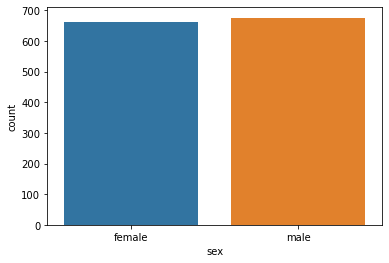

In [87]:
sns.countplot(data = df , x =df['sex'])

<AxesSubplot:xlabel='charges'>

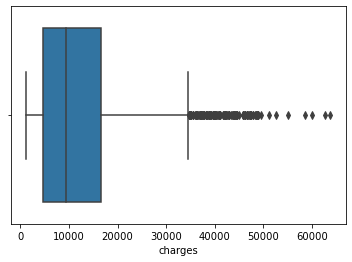

In [88]:
sns.boxplot(data = df , x = df['charges'])

In [89]:
len(df[df.charges > 32000])

155

In [90]:
a = df[df.charges > 32000].index

In [91]:
a

Int64Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
            ...
            1267, 1284, 1288, 1291, 1300, 1301, 1303, 1308, 1313, 1323],
           dtype='int64', length=155)

In [92]:
df.drop(index=a,inplace=True)

In [93]:
df.shape

(1183, 7)

<AxesSubplot:xlabel='age'>

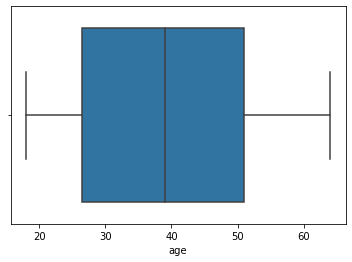

In [94]:
sns.boxplot(data = df , x = df['age'])

<AxesSubplot:xlabel='bmi'>

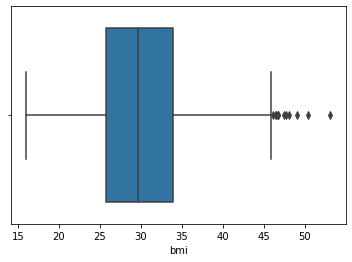

In [95]:
sns.boxplot(data=df , x = df["bmi"])

In [96]:
b = df[df.bmi > 45].index

In [97]:
df.drop(index=b,inplace=True)

In [98]:
df.shape

(1168, 7)

<AxesSubplot:xlabel='children'>

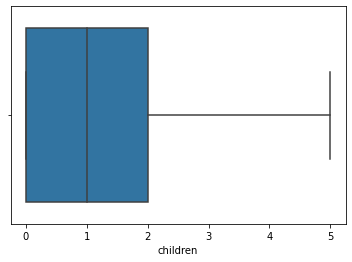

In [99]:
sns.boxplot(data = df , x = df['children'])

In [100]:
df.sex.value_counts()

female    600
male      568
Name: sex, dtype: int64

In [101]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1226,38,male,16.815,2,no,northeast,6640.54485
1102,29,male,38.940,1,no,southeast,3471.40960
272,41,male,37.050,2,no,northwest,7265.70250
593,21,female,21.850,1,yes,northeast,15359.10450
396,43,female,34.400,3,no,southwest,8522.00300
636,19,female,24.510,1,no,northwest,2709.11190
24,37,male,28.025,2,no,northwest,6203.90175
267,59,female,32.395,3,no,northeast,14590.63205
1077,21,male,26.030,0,no,northeast,2102.26470
278,59,male,31.790,2,no,southeast,12928.79110


In [102]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [103]:
scaler = MinMaxScaler()
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))

In [104]:
df['age'] = df['age']/100

In [106]:
df.replace(to_replace=['yes','no'],value=[1,0])

,age,sex,bmi,children,smoker,region,charges
0,0.19,female,0.414439,0,1,southwest,16884.92400
1,0.18,male,0.618188,1,0,southeast,1725.55230
2,0.28,male,0.591461,3,0,southeast,4449.46200
3,0.33,male,0.234120,0,0,northwest,21984.47061
4,0.32,male,0.448455,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.50,male,0.521000,3,0,northwest,10600.54830
1334,0.18,female,0.553974,0,0,northeast,2205.98080
1335,0.18,female,0.725095,0,0,southeast,1629.83350
1336,0.21,female,0.341548,0,0,southwest,2007.94500


In [108]:
df.replace(to_replace=['female','male'],value=[0,1],inplace=True)
df.replace(to_replace=['yes','no'],value=[0,1],inplace=True)

In [109]:
df

,age,sex,bmi,children,smoker,region,charges
0,0.19,0,0.414439,0,0,southwest,16884.92400
1,0.18,1,0.618188,1,1,southeast,1725.55230
2,0.28,1,0.591461,3,1,southeast,4449.46200
3,0.33,1,0.234120,0,1,northwest,21984.47061
4,0.32,1,0.448455,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.50,1,0.521000,3,1,northwest,10600.54830
1334,0.18,0,0.553974,0,1,northeast,2205.98080
1335,0.18,0,0.725095,0,1,southeast,1629.83350
1336,0.21,0,0.341548,0,1,southwest,2007.94500


In [118]:
df1 = pd.get_dummies(df,columns=['region'])

In [120]:
x = df1.drop(['charges'],axis=1)
y = df1.charges

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [130]:
model.score(x_test , y_test)

0.6626481205115876

<AxesSubplot:xlabel='charges'>

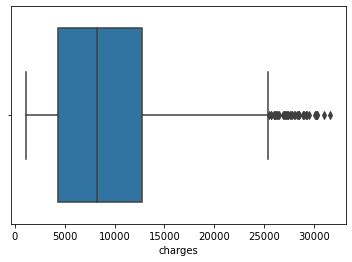

In [132]:
sns.boxplot(data=df1,x=df1['charges'])

In [134]:
ind = df1[df1.charges > 25000].index
df2 = df1.drop(index=ind)

<AxesSubplot:xlabel='charges'>

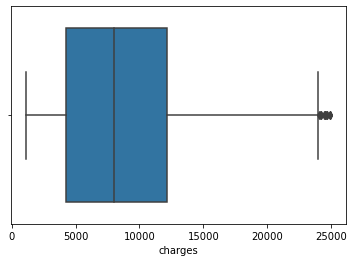

In [135]:
sns.boxplot(data = df2 , x= df2['charges'])

In [136]:
df2

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.19,0,0.414439,0,0,16884.92400,0,0,0,1
1,0.18,1,0.618188,1,1,1725.55230,0,0,1,0
2,0.28,1,0.591461,3,1,4449.46200,0,0,1,0
3,0.33,1,0.234120,0,1,21984.47061,0,1,0,0
4,0.32,1,0.448455,0,1,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1332,0.52,0,0.997570,3,1,11411.68500,0,0,0,1
1333,0.50,1,0.521000,3,1,10600.54830,0,1,0,0
1334,0.18,0,0.553974,0,1,2205.98080,1,0,0,0
1335,0.18,0,0.725095,0,1,1629.83350,0,0,1,0


In [140]:
x2 = df2.drop(['charges'],axis=1)
y2 = df2.charges

In [144]:
x_train , x_test , y_train , y_test = train_test_split(x2,y2,test_size=0.2,random_state=5)

In [145]:
model.fit(x_train , y_train)

LinearRegression()

In [146]:
model.score(x_test,y_test)

0.7742718872200978

<AxesSubplot:xlabel='charges'>

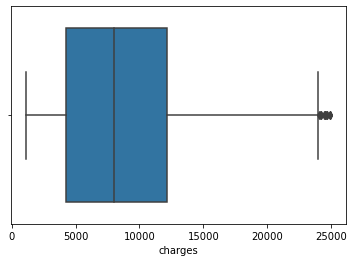

In [148]:
sns.boxplot(data = df2 , x = df2['charges'])

In [151]:
indice = df2[df2.charges > 23000].index
df3 = df2.drop(index = indice , axis=0)

In [152]:
df3.shape

(1093, 10)

In [171]:
x3 = df3.drop(['charges'],axis=1)
y3 =  df3.charges

In [172]:
x_train , x_test , y_train , y_test = train_test_split(x3,y3,test_size=0.2)

In [173]:
model.fit(x_train , y_train)

LinearRegression()

In [174]:
model.score(x_test,y_test)

0.7401220905244736

<AxesSubplot:xlabel='charges'>

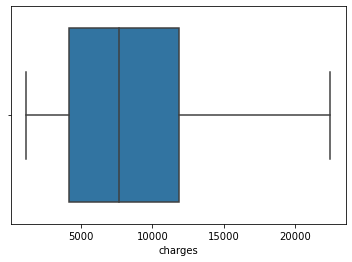

In [167]:
sns.boxplot(data=df3 , x = df3['charges'])

<AxesSubplot:xlabel='bmi'>

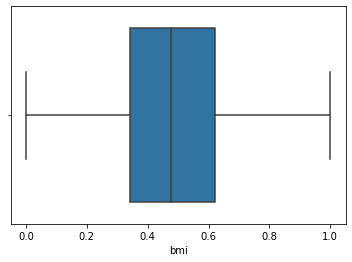

In [161]:
sns.boxplot(data = df3 , x = df3['bmi'])

<AxesSubplot:xlabel='age'>

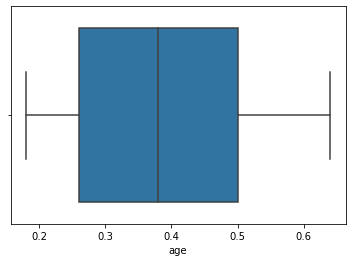

In [162]:
sns.boxplot(data=df3 , x = df3['age'])